In [6]:
%matplotlib inline

from sklearn import \
    datasets, \
    cross_validation, \
    preprocessing
import os
os.chdir("/Users/Ruihao/Desktop/course/Applied_Machine_Learning/HW1")
from numpy import *

/Users/Ruihao/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
train_set = genfromtxt("train.csv", delimiter = ",", dtype = int)
# get rid of the zeroth row
train_set = train_set[1:]

In [8]:
# generate a list of all vectors
features = array([line[1:] for line in train_set])
# generate a list of all labels
labels = array([line[0] for line in train_set])

Populating the interactive namespace from numpy and matplotlib


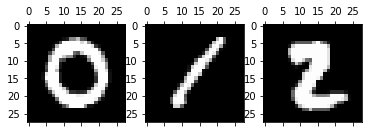

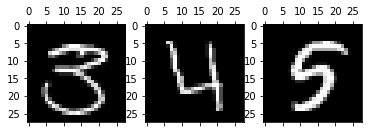

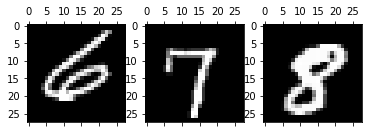

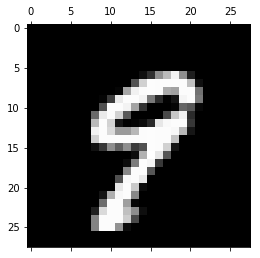

In [9]:
%pylab inline
# Write a function to display an MNIST digit. Display one of each digit.
#[1,0,16,7,3,8,21,6,10,11]
fig, (left,mid,right) = subplots(1,3)
left.matshow(features[1].reshape(28,28), cmap='gray')
mid.matshow(features[0].reshape(28,28), cmap='gray')
right.matshow(features[16].reshape(28,28), cmap='gray')
fig, (left,mid,right) = subplots(1,3)
left.matshow(features[7].reshape(28,28), cmap='gray')
mid.matshow(features[3].reshape(28,28), cmap='gray')
right.matshow(features[8].reshape(28,28), cmap='gray')
fig, (left,mid,right) = subplots(1,3)
left.matshow(features[21].reshape(28,28), cmap='gray')
mid.matshow(features[6].reshape(28,28), cmap='gray')
right.matshow(features[10].reshape(28,28), cmap='gray')
matshow(features[11].reshape(28,28), cmap='gray')

defaultdict(<type 'float'>, {0: 0.09838095238095237, 1: 0.11152380952380953, 2: 0.09945238095238096, 3: 0.1035952380952381, 4: 0.09695238095238096, 5: 0.09035714285714286, 6: 0.0985, 7: 0.10478571428571429, 8: 0.09673809523809523, 9: 0.09971428571428571})


(array([ 0.10931217,  0.12391534,  0.11050265,  0.11510582,  0.10772487,
         0.10039683,  0.10944444,  0.11642857,  0.10748677,  0.11079365]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

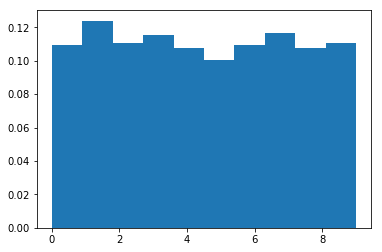

In [10]:
from collections import *

map = defaultdict(float)
for label in labels:
    map[label] += 1
size = len(labels)
for entry in map:
    map[entry] /= size
print (map)
# Display a normalized histogram of digit counts
hist(labels, bins = 10,normed = 1)

1046.59543282
489.679487012
1380.8772574
1832.66499939
1392.96159315
1356.88098225
1066.36766643
1446.51132038
863.501013317
1593.777588
910.576740314


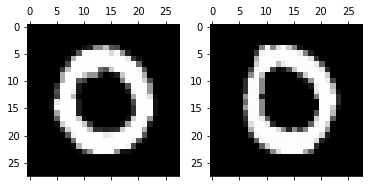

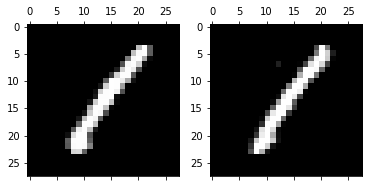

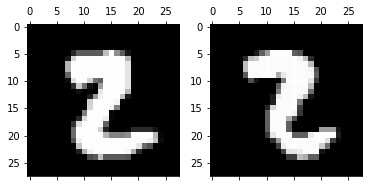

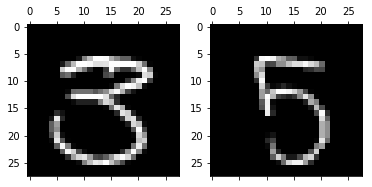

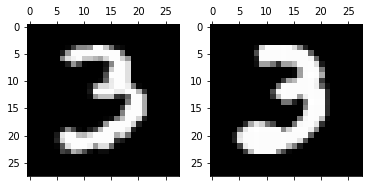

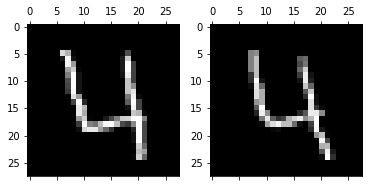

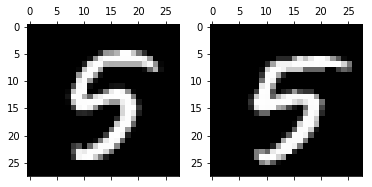

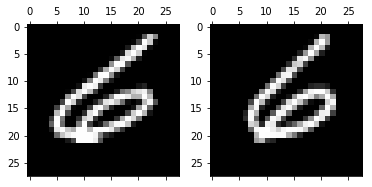

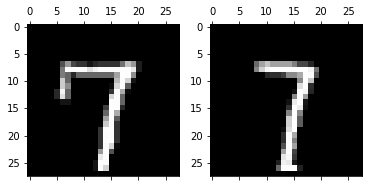

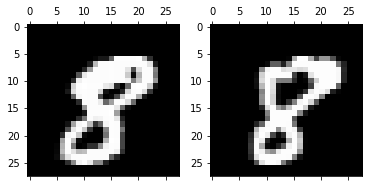

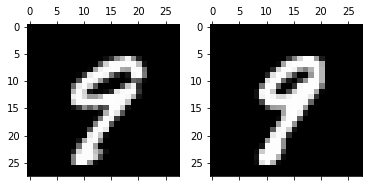

In [13]:
# there are two 3 in this set, one is a bad because its nearest neighbor tends
# to be different than 3
chosen = [1,0,16,7,9,3,8,21,6,10,11] 
# compute "distance" between two image
def computeDistance(a, b):
    dis = 0
    # zip: all pairs of entry a and b 
    for u,v in zip(a,b):
        dis += (u-v)**2
    return dis**0.5

# return the nearest neighbor of the input image
def match(case):
    min, id = 2**31, 0
    for i in range(len(features)):
        if i == case: continue
        dis = computeDistance(features[case], features[i])
        if dis < min:
            min = dis
            id = i
    print computeDistance(features[case], features[id])
    return id
# for each digit, find its neighbor and display its picture
#9
# neighbor2 = match(9)
# fig, (source,target) = subplots(1,2)
# source.matshow(features[9].reshape(28,28), cmap='gray')
# target.matshow(features[neighbor].reshape(28,28), cmap='gray')


for digit in chosen:
    neighbor = match(digit)
    fig, (source,target) = subplots(1,2)
    source.matshow(features[digit].reshape(28,28), cmap='gray')
    target.matshow(features[neighbor].reshape(28,28), cmap='gray')

(array([  8.87653558e-09,   8.87653558e-09,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   8.87653558e-09,
          0.00000000e+00,   8.87653558e-09,   8.87653558e-09,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   8.87653558e-09,
          0.00000000e+00,   0.00000000e+00,   8.87653558e-09,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.55061423e-08,   0.00000000e+00,   8.87653558e-09,
          1.77530712e-08,   0.00000000e+00,   3.55061423e-08,
          1.77530712e-08,   2.66296068e-08,   8.87653558e-09,
          2.66296068e-08,   4.43826779e-08,   2.66296068e-08,
          1.77530712e-08,   1.77530712e-08,   2.66296068e-08,
          4.43826779e-08,   7.10122847e-08,   3.55061423e-08,
          7.98888203e-08,   5.32592135e-08,   6.21357491e-08,
        

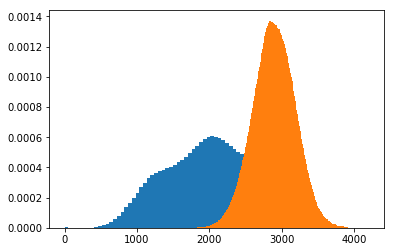

In [14]:
# group all entries with label = 1
one = []
for i,label in enumerate(labels):
    if label == 1: one.append(features[i])
# group all entries with label = 0
zero = []
for i,label in enumerate(labels):
    if label == 0: zero.append(features[i])
#print len(zero) 
from sklearn.metrics.pairwise import euclidean_distances
# find all distances between any two zero digits
dis0to0 = euclidean_distances(zero, zero)
dis0to0 = dis0to0.flatten()
# find all distances between any two one digits
dis1to1 = euclidean_distances(one, one)
dis1to1 = dis1to1.flatten()
# place all dis0to0 and dis1to1 to genuine group
genuine = np.append(dis0to0, dis1to1)
hist(genuine, bins = 80, normed = True)
# find all diatnces between any one and zero digits
# place all dis1to0 to imposter group
dis1to0 = euclidean_distances(one, zero)
imposter = dis1to0.flatten()
# generate the histogram
hist(imposter, bins = 500, normed = True)
# print genuine
# print imposter

In [15]:
# imposter, genuine
x, y = [], []
for i in range(1500, 4500, 20):
# set i to be the threshold，all value smaller than threshold 
# are considered as genuine, others are considered as imposter
    count1 = (genuine<i).sum()
    count2 = (imposter<i).sum()
    x.append(float(count1)/len(genuine))
    y.append(float(count2)/len(imposter))

print (x)
print (y)

[0.22097916401799592, 0.22927474952118868, 0.23769767627843646, 0.2462116489564579, 0.25489602514835974, 0.26371086973461344, 0.27260732755615524, 0.28171038169566875, 0.29093862397624604, 0.3003261966181772, 0.309848953997203, 0.3195764109041844, 0.3294932392252074, 0.33960702612033644, 0.34991900193985226, 0.36041691444554264, 0.37108666587377426, 0.38194666021416296, 0.39301145661169734, 0.404258293586184, 0.4156442114069876, 0.4271393740798005, 0.43878863812527424, 0.450617738370114, 0.46251250856118736, 0.47450468148281816, 0.4865455045051326, 0.49865922578158, 0.5107608486136003, 0.5228778508241296, 0.5348815582796422, 0.5468883928754517, 0.5588349915721006, 0.5706853666238778, 0.5824340839837102, 0.5940755045461443, 0.6055943001972661, 0.6169664791066016, 0.6281359065425927, 0.6391519503102533, 0.6499772385198066, 0.6606629332370926, 0.6712265156890167, 0.6816452243953853, 0.6919071659701517, 0.7020223370093466, 0.7120157033707496, 0.7219006451136638, 0.7317344247907379, 0.74149

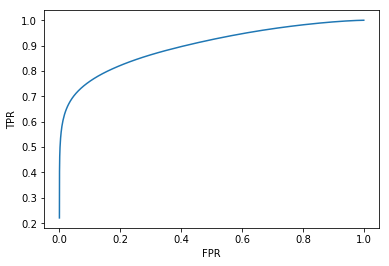

In [16]:
from matplotlib import pyplot as plt
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(y,x)

In [17]:
from collections import *
from sklearn.metrics import confusion_matrix

# self implemented kNN algoithm
# current test case, whole training case, label set, k value
def kNN(v, data, labels, k):
    # row number
    size = data.shape[0]
    # repeat and expand the test entry to become a 2d matrix
    # find distance between case and training set
    diff = tile(v, (size, 1)) - data
    diff = diff ** 2
    sumDiff = diff.sum(axis = 1)
    dis = sumDiff**0.5
    # sort list and return the id of entry
    sortedID = dis.argsort()
    
    # create a map that shows frequency of all candidate digits
    cnt = defaultdict(int)
    for i in range(k):
        res = labels[sortedID[i]]
        cnt[res] += 1
        # sort the map based on the frequency count
    od = sorted(cnt.items(), key=lambda t: t[1], reverse=True)
    return od[0][0]

cnt = 0
y = labels[:1000]
pred = []
cnt = 0
for i in range(1000):
    id = kNN(features[i], features[1000:8000], labels[1000:8000], 10)
    # push the generated prediction to list
    pred.append(id)
    if y[i] == id:
        cnt += 1
pred = array(pred)
print(str(cnt)+"/1000")
#print(confusion_matrix(y, pred))

939/1000


In [18]:
# use sklearn's kNN to do cross validation.
from sklearn.neighbors import KNeighborsClassifier
def crossValidation():
    neighbor = KNeighborsClassifier(n_neighbors=3)
    all_folds = cross_validation.KFold(len(features), n_folds = 3)
    loop = 1
    for train, test in all_folds:
        test_attributes = features[test]
        test_labels = labels[test]
        neighbor.fit(features[train],labels[train])
        prediction = neighbor.predict(test_attributes)
        print(confusion_matrix(test_labels, prediction))
crossValidation()

[[1361    0    2    0    0    2    5    0    1    0]
 [   0 1564    1    1    1    1    3    1    1    2]
 [   9   18 1365    4    4    1    0   21    3    2]
 [   0    4    7 1371    0   11    1    4    8    4]
 [   0   16    1    0 1311    0    5    1    0   34]
 [   4    1    2   21    0 1226   10    1    2    9]
 [   9    2    0    0    3    5 1380    0    0    0]
 [   1   23    3    0    6    0    0 1412    0   19]
 [   9   12    7   23    3   29    6    4 1233   17]
 [   4    3    0    7   14    4    2   23    3 1307]]
[[1341    0    2    0    0    2    3    0    1    1]
 [   0 1520    5    0    0    0    1    6    0    0]
 [   8   19 1329    5    1    0    2   30    3    0]
 [   4    2   12 1442    0   15    1   10    5    8]
 [   3   15    0    0 1327    0    3    2    1   37]
 [   6    1    0   27    2 1182   16    1    0   10]
 [   9    3    0    0    1    8 1357    0    2    0]
 [   0   19    3    3    3    0    0 1416    0   16]
 [   6   12    9   24   10   27    5    3 124

In [30]:
# read the test set ad get rid of the first line
test = genfromtxt("test.csv", delimiter=",", dtype=int)
#test = test[1:]

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
# use sklearn's kNN to make prediction on test sets
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(features,labels)
y_prediction = neighbor.predict(test)
import pandas as spd
y_prediction = spd.Series(y_prediction)
#y_prediction.drop(y_prediction.index[[0]])
y_prediction.to_csv('submission.csv')
# the final accuracy is 96.86% with k = 3

In [32]:
print len(y_prediction)
print y_prediction

28001
0        1
1        2
2        0
3        9
4        9
5        3
6        7
7        0
8        3
9        0
10       3
11       5
12       7
13       4
14       0
15       4
16       3
17       3
18       1
19       9
20       0
21       9
22       1
23       1
24       5
25       7
26       4
27       2
28       7
29       4
        ..
27971    5
27972    0
27973    4
27974    8
27975    0
27976    3
27977    6
27978    0
27979    1
27980    9
27981    3
27982    1
27983    1
27984    0
27985    4
27986    5
27987    2
27988    2
27989    9
27990    6
27991    7
27992    6
27993    1
27994    9
27995    7
27996    9
27997    7
27998    3
27999    9
28000    2
Length: 28001, dtype: int64
